<a href="https://colab.research.google.com/github/Ireneyou33/Model-Comparison-and-Forecasting-on-COVID-19/blob/master/Neural_Networks(NN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout
import datetime as dt
from tensorflow.python.keras.layers import Dense, LSTM
from tensorflow.python.keras import Sequential
from keras.models import load_model
from keras.models import model_from_json
from datetime import datetime, timedelta
import json
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%run functions.ipynb
%run NN_functions.ipynb

In [ ]:
df_conf=pd.read_csv("/content/drive/My Drive/ST494/project/Confirmed.csv")
df_death=pd.read_csv("/content/drive/My Drive/ST494/project/Deaths.csv")
df_recover=pd.read_csv("/content/drive/My Drive/ST494/project/Recovered.csv")

In [ ]:
date=df_conf.columns[4:]
for i in range(len(date)):
    date.values[i]=pd.to_datetime(date.values[i], format="%m/%d/%y")
print(len(date))

idx = int(len(date)*0.8)
print(idx)

159
127


In [ ]:
start_date=date[0]

## World Class

In [ ]:
df_worldclass=worldclass_dataframe(df_conf)

In [ ]:
df_worldclass

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28
0,555,654,941,1434,2118,2927,5578,6166,8234,9927,12038,16787,19881,23892,27635,30794,34391,37120,40150,42762,44802,45221,60368,66885,69030,71224,73258,75136,75639,76197,76819,78572,78958,79525,80372,81346,82704,84070,85967,88325,...,5005761,5112366,5220585,5321022,5417354,5504324,5599216,5702113,5820253,5941938,6070884,6178860,6275246,6387981,6515768,6642985,6776258,6902782,7015871,7119487,7243018,7376659,7515050,7644586,7779207,7912752,8034787,8174568,8350578,8489604,8670951,8829814,8961235,9099271,9264657,9432072,9610551,9802294,9980257,10145791


In [ ]:
df_worldclass.iloc[:,127]

0    5820253
Name: 2020-05-28 00:00:00, dtype: int64

In [ ]:
model = NeuralNets(train=False, world=True, w=1)

Load Model
With window size 1
Train Score: 595849728.00 MSE (24410.03 RMSE)
Test Score: 3579241472.00 MSE (59826.76 RMSE)


In [ ]:
model2 = NeuralNets(train=False, world=True, w=3)

Load Model
With window size 3
Train Score: 1785803392.00 MSE (42258.77 RMSE)
Test Score: 583023872.00 MSE (24145.89 RMSE)


In [ ]:
model3 = NeuralNets(train=False, world=True, w=5)

Load Model
With window size 5
Train Score: 1034898048.00 MSE (32169.83 RMSE)
Test Score: 5892761600.00 MSE (76764.33 RMSE)


In [ ]:
model4 = NeuralNets(train=False, world=True, w=7)

Load Model
With window size 7
Train Score: 160804768.00 MSE (12680.88 RMSE)
Test Score: 1527200640.00 MSE (39079.41 RMSE)


In [ ]:
df = NN_pred(model,world=True, w=1)
df

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28
Original Data,555.0,654.000000,941.000000,1434.00000,2118.000000,2927.000000,5578.000000,6166.000000,8234.000000,9927.000000,12038.000000,16787.000000,19881.000000,23892.000000,27635.000000,30794.000000,34391.000000,37120.000000,40150.000000,42762.000000,44802.0000,45221.000000,60368.000000,66885.000000,69030.000000,71224.000000,73258.000000,75136.00000,75639.000,76197.000000,76819.000000,78572.000000,78958.000000,79525.000000,80372.000000,81346.00000,82704.00000,84070.00000,85967.000,88325.000000,...,5005761.0,5112366.0,5220585.0,5321022.0,5417354.0,5504324.0,5599216.0,5702113.0,5820253.0,5941938.0,6070884.0,6178860.0,6275246.0,6387981.0,6515768.0,6642985.0,6776258.0,6902782.0,7015871.0,7119487.0,7243018.0,7376659.0,7515050.0,7644586.0,7779207.0,7912752.0,8034787.0,8174568.0,8350578.0,8489604.0,8670951.0,8829814.0,8961235.0,9099271.0,9264657.0,9432072.0,9610551.0,9802294.0,9980257.0,10145791.0
Predicted Data,NaN,580.911865,682.427246,976.71936,1482.245483,2183.624512,3013.179688,5731.536621,6334.476074,8455.020508,10191.036133,12355.672852,17225.333984,20397.947266,24510.859375,28348.960938,31588.226562,35276.617188,38074.957031,41181.941406,43860.3125,45952.144531,46381.789062,61913.648438,68596.226562,70795.734375,73045.476562,75131.15625,77056.875,77572.648438,78144.828125,78782.640625,80580.171875,80975.976562,81557.390625,82425.90625,83424.65625,84817.15625,86217.875,88163.070312,...,5030861.5,5132959.5,5242273.0,5353241.5,5456230.5,5555010.0,5644190.0,5741493.0,NaN,5968145.5,6092923.0,6225145.0,6335864.5,6434699.5,6550299.0,6681332.5,6811782.0,6948441.0,7078180.5,7194142.5,7300391.0,7427060.5,7564097.5,7706005.0,7838831.5,7976873.0,8113812.0,8238947.0,8382279.5,8562761.0,8705320.0,8891274.0,9054174.0,9188934.0,9330477.0,9500066.0,9671734.0,9854748.0,10051363.0,10233847.0


In [ ]:
df2 = NN_pred(model2,world=True, w=3)
df2

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28
Original Data,555.0,654.0,941.0,1434.000000,2118.000000,2927.000000,5578.000000,6166.000000,8234.000000,9927.000000,12038.000000,16787.000000,19881.000000,23892.000000,27635.000000,30794.000000,34391.000000,37120.000,40150.00000,42762.000000,44802.000000,45221.000000,60368.000000,66885.00000,69030.000000,71224.000000,73258.000000,75136.000000,75639.000000,76197.000000,76819.000000,78572.000000,78958.000000,79525.000000,80372.000000,81346.000000,82704.000000,84070.000,85967.000000,88325.0000,...,5005761.0,5112366.0,5220585.0,5321022.0,5417354.0,5504324.0,5599216.0,5702113.0,5820253.0,5941938.0,6070884.0,6178860.0,6275246.0,6387981.0,6515768.0,6642985.0,6776258.0,6902782.0,7015871.0,7119487.0,7243018.0,7376659.0,7515050.0,7644586.0,7779207.0,7912752.0,8034787.0,8174568.0,8350578.0,8489604.0,8670951.0,8829814.0,8961235.0,9099271.0,9264657.0,9432072.0,9610551.0,9802294.0,9980257.0,10145791.0
Predicted Data,NaN,NaN,NaN,802.160706,1147.023804,1700.234741,2432.694336,4028.068848,5515.204102,7282.616699,8963.841797,11028.797852,14267.678711,17984.009766,22058.025391,25986.513672,29626.119141,33296.875,36357.90625,39565.582031,42357.089844,44789.242188,46007.542969,54277.40625,62824.289062,68819.523438,72088.304688,74239.015625,76276.242188,77384.648438,78260.601562,78863.492188,80201.617188,80884.226562,81716.898438,82435.421875,83323.234375,84539.625,85855.203125,87596.3125,...,5000937.5,5100380.0,5206636.0,5315951.5,5422294.0,5525126.5,5619554.5,5716436.0,NaN,NaN,NaN,6181070.5,6299167.0,6408159.0,6520577.0,6642486.0,6770395.0,6905549.5,7037339.5,7160965.5,7274796.0,7396417.5,7525515.5,7663968.5,7800017.5,7938897.5,8075874.5,8206622.0,8346354.0,8509156.0,8658921.0,8837617.0,9000581.0,9152439.0,9298586.0,9456612.0,9622051.0,9801206.0,9991038.0,10177019.0


In [ ]:
df3 = NN_pred(model3, world=True, w=5)
df3

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28
Original Data,555.0,654.0,941.0,1434.0,2118.0,2927.000000,5578.000000,6166.000000,8234.000000,9927.000000,12038.000000,16787.000000,19881.000000,23892.000000,27635.000000,30794.000000,34391.0000,37120.000000,40150.000000,42762.000000,44802.000000,45221.000000,60368.000000,66885.000000,69030.000000,71224.000000,73258.000000,75136.00000,75639.00000,76197.00000,76819.000000,78572.000000,78958.000000,79525.00,80372.000000,81346.000000,82704.00000,84070.000000,85967.000000,88325.000000,...,5005761.0,5112366.0,5220585.0,5321022.0,5417354.0,5504324.0,5599216.0,5702113.0,5820253.0,5941938.0,6070884.0,6178860.0,6275246.0,6387981.0,6515768.0,6642985.0,6776258.0,6902782.0,7015871.0,7119487.0,7243018.0,7376659.0,7515050.0,7644586.0,7779207.0,7912752.0,8034787.0,8174568.0,8350578.0,8489604.0,8670951.0,8829814.0,8961235.0,9099271.0,9264657.0,9432072.0,9610551.0,9802294.0,9980257.0,10145791.0
Predicted Data,NaN,NaN,NaN,NaN,NaN,1991.522827,2958.194824,4473.654297,7189.339355,9052.902344,10342.277344,12610.556641,15622.361328,20810.003906,25804.304688,29438.527344,33213.1875,36385.441406,39363.871094,42130.472656,44598.808594,46956.472656,48203.414062,51516.371094,66723.648438,80487.140625,79017.554688,75671.96875,76516.71875,77894.03125,77913.421875,77439.804688,78052.304688,79793.25,80745.054688,80711.414062,81437.21875,82798.742188,84422.757812,86248.421875,...,4944928.0,5046331.5,5156441.0,5270007.5,5382882.0,5483448.0,5571047.5,5652736.0,NaN,NaN,NaN,NaN,NaN,6363187.5,6447357.5,6554029.5,6694599.5,6838819.0,6975465.0,7101272.0,7205235.5,7300013.0,7420638.5,7570429.0,7720537.5,7855484.0,7985857.0,8117700.0,8242129.5,8387001.5,8572664.0,8745213.0,8913367.0,9081384.0,9202236.0,9322843.0,9493372.0,9686347.0,9879836.0,10080182.0


In [ ]:
df4 = NN_pred(model4, world=True, w=7)
df4

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28
Original Data,555.0,654.0,941.0,1434.0,2118.0,2927.0,5578.0,6166.000000,8234.000000,9927.000000,12038.000000,16787.000000,19881.000000,23892.000000,27635.000000,30794.000000,34391.000000,37120.000000,40150.000000,42762.000000,44802.000000,45221.000000,60368.000000,66885.000000,69030.000000,71224.000000,73258.000000,75136.000000,75639.000000,76197.00,76819.000000,78572.000000,78958.000000,79525.000000,80372.000000,81346.000000,82704.000000,84070.000000,85967.000000,88325.00000,...,5005761.0,5112366.0,5220585.0,5321022.0,5417354.0,5504324.0,5599216.0,5702113.0,5820253.0,5941938.0,6070884.0,6178860.0,6275246.0,6387981.0,6515768.0,6642985.0,6776258.0,6902782.0,7015871.0,7119487.0,7243018.0,7376659.0,7515050.0,7644586.0,7779207.0,7912752.0,8034787.0,8174568.0,8350578.0,8489604.0,8670951.0,8829814.0,8961235.0,9099271.0,9264657.0,9432072.0,9610551.0,9802294.0,9980257.0,10145791.0
Predicted Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2783.181396,4625.065918,6534.001953,8108.403809,10879.431641,13314.623047,17092.839844,21790.126953,25912.621094,31410.042969,36430.003906,40979.113281,44526.296875,46750.949219,48739.378906,49793.382812,55866.574219,68067.820312,78483.609375,75660.921875,77367.664062,87378.507812,81559.75,78604.679688,78575.882812,79543.320312,80585.234375,80247.007812,80495.960938,81766.289062,83576.171875,84203.234375,86180.96875,...,4986772.5,5087631.5,5189170.0,5292855.0,5407965.5,5510975.0,5601960.0,5692544.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6609863.0,6748106.0,6868084.0,6995345.0,7130337.0,7242308.5,7346610.5,7477489.5,7616338.0,7745567.0,7874877.0,8022022.5,8159001.5,8286770.5,8437538.0,8615957.0,8778059.0,8941026.0,9116986.0,9252722.0,9374606.0,9573552.0,9737093.0,9908938.0,10112547.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


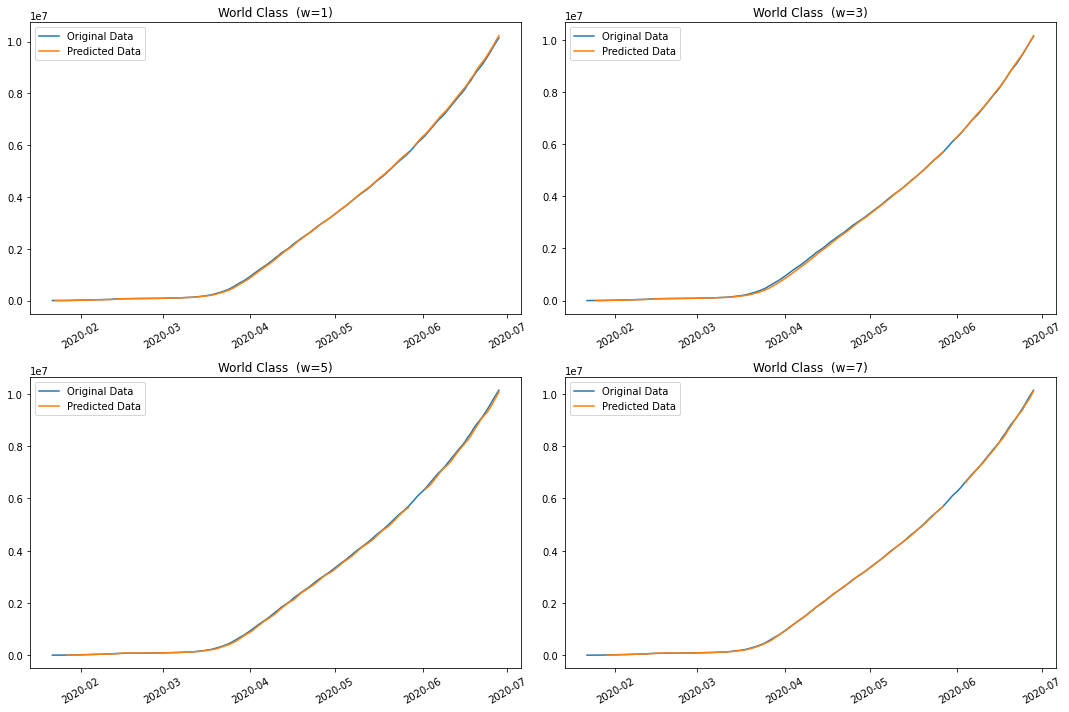

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(df.iloc[0])
plt.plot(df.iloc[1])
plt.xticks(rotation=30)
plt.legend('best', labels=["Original Data","Predicted Data"])
plt.title("World Class  (w=1)")

plt.subplot(2,2,2)
plt.plot(df2.iloc[0])
plt.plot(df2.iloc[1])
plt.xticks(rotation=30)
plt.legend('best', labels=["Original Data","Predicted Data"])
plt.title("World Class  (w=3)")

plt.subplot(2,2,3)
plt.plot(df3.iloc[0])
plt.plot(df3.iloc[1])
plt.xticks(rotation=30)
plt.legend('best', labels=["Original Data","Predicted Data"])
plt.title("World Class  (w=5)")

plt.subplot(2,2,4)
plt.plot(df4.iloc[0])
plt.plot(df4.iloc[1])
plt.xticks(rotation=30)
plt.legend('best', labels=["Original Data","Predicted Data"])
plt.title("World Class  (w=7)")

plt.tight_layout()
plt.show()

### Walk Foreward Validation


In [ ]:
windowsize=[1,3,5,7]
init_trainsize=30

In [ ]:
train_RMSE, test_RMSE, train_size = wfv(windowsize, df_worldclass, region="world", train=True, init_trainsize=30)

training with w = 1
training with w = 3
training with w = 5
training with w = 7


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


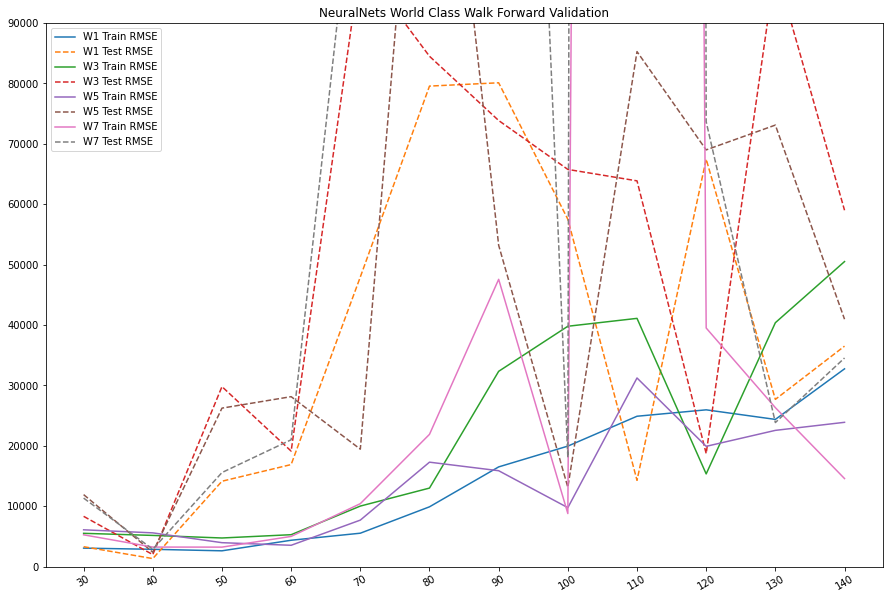

In [ ]:
xaxis = list(range(len(train_RMSE[0])))
plt.figure(figsize=(15,10))
plt.plot(train_RMSE[0], linestyle="solid")
plt.plot(test_RMSE[0], linestyle="dashed")

plt.plot(train_RMSE[1], linestyle="solid")
plt.plot(test_RMSE[1], linestyle="dashed")

plt.plot(train_RMSE[2], linestyle="solid")
plt.plot(test_RMSE[2], linestyle="dashed")

plt.plot(train_RMSE[3], linestyle="solid")
plt.plot(test_RMSE[3], linestyle="dashed")

plt.ylim((0,90000))
plt.xticks(xaxis, train_size, rotation=30)
plt.legend('best', labels=["W1 Train RMSE","W1 Test RMSE", 
                           "W3 Train RMSE", "W3 Test RMSE", 
                           "W5 Train RMSE", "W5 Test RMSE",
                          "W7 Train RMSE", "W7 Test RMSE"])
plt.title("NeuralNets World Class Walk Forward Validation")
plt.show()

In [ ]:
w1_train_mean = np.mean(train_RMSE[0])
w1_train_sd = np.std(train_RMSE[0])
w1_test_mean = np.mean(test_RMSE[0])
w1_test_sd = np.std(test_RMSE[0])

w3_train_mean = np.mean(train_RMSE[1])
w3_train_sd = np.std(train_RMSE[1])
w3_test_mean = np.mean(test_RMSE[1])
w3_test_sd = np.std(test_RMSE[1])

w5_train_mean = np.mean(train_RMSE[2])
w5_train_sd = np.std(train_RMSE[2])
w5_test_mean = np.mean(test_RMSE[2])
w5_test_sd = np.std(test_RMSE[2])

w7_train_mean = np.mean(train_RMSE[3])
w7_train_sd = np.std(train_RMSE[3])
w7_test_mean = np.mean(test_RMSE[3])
w7_test_sd = np.std(test_RMSE[3])

In [ ]:
print("Training set with window size = 1 has mean:{:.2f}, sd:{:.2f}".format(w1_train_mean, w1_train_sd))
print("Tesing set with window size = 1 has mean:{:.2f}, sd:{:.2f}".format(w1_test_mean, w1_test_sd))
print("Training set with window size = 3 has mean:{:.2f}, sd:{:.2f}".format(w3_train_mean, w3_train_sd))
print("Testing set with window size = 3 has mean:{:.2f}, sd:{:.2f}".format(w3_test_mean, w3_test_sd))
print("Training set with window size = 5 has mean:{:.2f}, sd:{:.2f}".format(w5_train_mean, w5_train_sd))
print("Testing set with window size = 5 has mean:{:.2f}, sd:{:.2f}".format(w5_test_mean, w5_test_sd))
print("Training set with window size = 7 has mean:{:.2f}, sd:{:.2f}".format(w7_train_mean, w7_train_sd))
print("Testing set with window size = 7 has mean:{:.2f}, sd:{:.2f}".format(w7_test_mean, w7_test_sd))

Training set with window size = 1 has mean:14401.57, sd:10468.34
Tesing set with window size = 1 has mean:37231.05, sd:27500.38
Training set with window size = 3 has mean:21936.51, sd:16682.84
Testing set with window size = 3 has mean:52009.00, sd:33574.55
Training set with window size = 5 has mean:13954.42, sd:8748.87
Testing set with window size = 5 has mean:48255.41, sd:41360.14
Training set with window size = 7 has mean:155548.16, sd:460072.34
Testing set with window size = 7 has mean:467660.14, sd:1340968.61


w= 5 smaller train, higher test

### NeuralNets Forecast

In [ ]:
w=1
r=1
forecast_days=10
world_forecast10_w1 = NN_forecast(df, model, forecast_days=10, w=w, r=r)
world_forecast10_w1.to_csv("worldNN_forecast10_w1.csv", index=False, encoding='utf-8')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


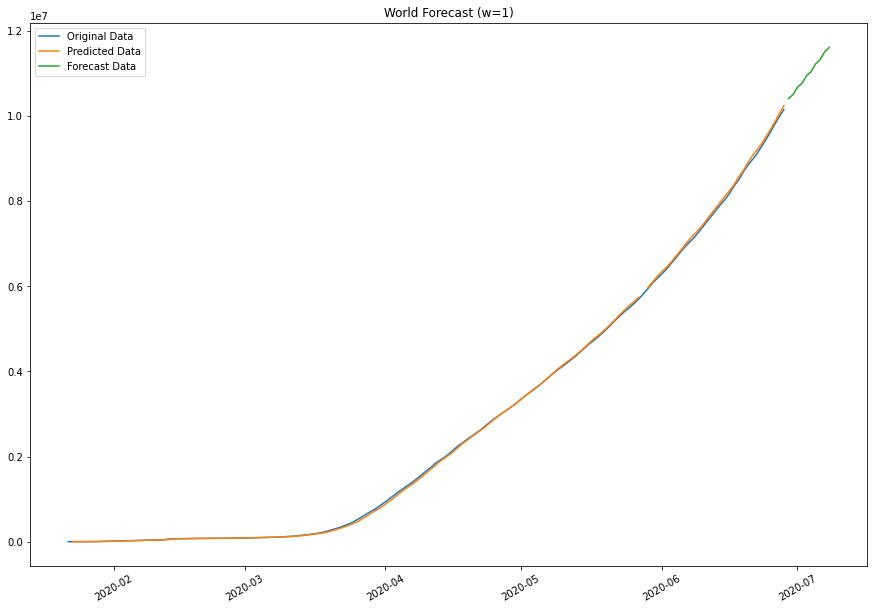

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(df.iloc[0])
plt.plot(df.iloc[1])
plt.plot(world_forecast10_w1.iloc[1,-forecast_days:])
plt.xticks(rotation=30)
plt.legend('best', labels=["Original Data","Predicted Data", "Forecast Data"])
plt.title("World NN Forecast (w=1)")
plt.show()

In [ ]:
w=5
r=1
forecast_days=10
world_forecast10_w5 = NN_forecast(df3, model3, forecast_days=forecast_days, w=w, r=r)
world_forecast10_w5.to_csv('worldNN_forecast10_w{}.csv'.format(w), index=False, encoding='utf-8')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


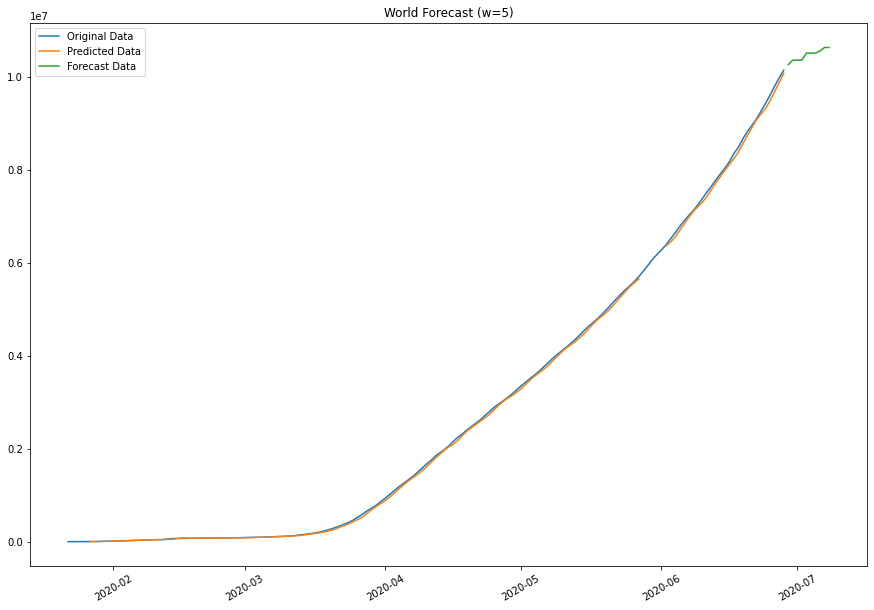

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(df3.iloc[0])
plt.plot(df3.iloc[1])
plt.plot(world_forecast10_w5.iloc[1,-forecast_days:])
plt.xticks(rotation=30)
plt.legend('best', labels=["Original Data","Predicted Data", "Forecast Data"])
plt.title("World NN Forecast (w=5)")
plt.show()

Hence, w = 1 is better

## China

In [ ]:
df_china, _, _ = sum_regioncase(df_conf, "China", region_level="county")

In [ ]:
model = NeuralNets(train=False, world=False, country="China", w=1)

Load Model
With window size 1
Train Score: 3270478.75 MSE (1808.45 RMSE)
Test Score: 403617.06 MSE (635.31 RMSE)


In [ ]:
model2 = NeuralNets(train=False, world=False, country="China", w=3)

Load Model
With window size 3
Train Score: 2329906.75 MSE (1526.40 RMSE)
Test Score: 70056.58 MSE (264.68 RMSE)


In [ ]:
model3 = NeuralNets(train=False, world=False, country="China", w=5)

Load Model
With window size 5
Train Score: 2187383.50 MSE (1478.98 RMSE)
Test Score: 35591.35 MSE (188.66 RMSE)


In [ ]:
model4 = NeuralNets(train=False, world=False, country="China", w=7)

Load Model
With window size 7
Train Score: 3206900.50 MSE (1790.78 RMSE)
Test Score: 48512.25 MSE (220.25 RMSE)


In [ ]:
df = NN_pred(model,world=False, country="China", w=1)
df

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28
Original Data,548.0,643.000000,920.000000,1406.000000,2075.000000,2877.000000,5509.000000,6087.000000,8141.000000,9802.000000,11891.00000,16630.000000,19716.000000,23707.000000,27440.0000,30587.000000,34110.000000,36814.000000,39829.000000,42354.000000,44386.000000,44759.000000,59895.000000,66358.000000,68413.0000,70513.0000,72434.000000,74211.000000,74619.000,75077.000000,75550.000000,77001.000000,77022.000000,77241.000000,77754.000000,78166.00000,78600.000000,78928.000000,79356.000000,79932.000000,...,84063.000000,84063.000000,84081.000000,84084.000000,84095.000000,84102.000,84103.000000,84106.0000,84106.0,84123.000000,84128.000000,84146.000,84154.000000,84161.000000,84160.000000,84171.000,84177.000000,84186.00,84191.000000,84195.000000,84198.000000,84209.000000,84216.0,84228.000000,84286.000000,84335.000000,84378.00000,84422.000000,84458.000000,84494.00000,84494.0000,84553.0000,84572.000000,84624.00000,84653.000000,84673.000000,84701.000000,84725.000000,84743.000000,84757.00000
Predicted Data,NaN,561.824463,657.552612,936.675476,1426.400146,2100.527344,2908.673828,5560.845215,6143.275391,8213.017578,9886.74707,11991.756836,16767.076172,19876.726562,23898.3125,27659.921875,30831.041016,34381.039062,37105.765625,40143.871094,42688.222656,44735.792969,45111.652344,60363.660156,66876.1875,68946.9375,71063.039062,72998.757812,74789.375,75200.507812,75662.007812,76138.632812,77600.757812,77621.921875,77842.601562,78359.53125,78774.679688,79212.007812,79542.523438,79973.804688,...,84716.882812,84716.882812,84716.882812,84735.023438,84738.039062,84749.125,84756.179688,84757.1875,NaN,84760.210938,84777.335938,84782.375,84800.515625,84808.578125,84815.632812,84814.625,84825.703125,84831.75,84840.820312,84845.859375,84849.890625,84852.914062,84864.0,84871.054688,84883.148438,84941.585938,84990.96875,85034.289062,85078.632812,85114.90625,85151.1875,85151.1875,85210.632812,85229.78125,85282.179688,85311.398438,85331.554688,85359.765625,85383.953125,85402.09375


In [ ]:
df2 = NN_pred(model2,world=False, country="China", w=3)
df2

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28
Original Data,548.0,643.0,920.0,1406.000000,2075.000000,2877.000000,5509.000000,6087.000000,8141.000000,9802.000000,11891.000000,16630.000000,19716.00000,23707.000000,27440.000000,30587.000000,34110.000000,36814.000000,39829.000000,42354.000000,44386.000000,44759.000000,59895.000000,66358.000000,68413.00000,70513.000000,72434.000000,74211.000000,74619.000000,75077.00000,75550.000000,77001.000000,77022.000000,77241.000000,77754.000000,78166.000000,78600.0000,78928.0000,79356.0000,79932.00000,...,84063.000000,84063.000000,84081.000000,84084.000000,84095.000,84102.000000,84103.000000,84106.000000,84106.0,84123.0,84128.0,84146.000,84154.000000,84161.000000,84160.000000,84171.0000,84177.000000,84186.00000,84191.000000,84195.000000,84198.0,84209.000000,84216.000000,84228.000000,84286.0000,84335.000000,84378.000000,84422.000000,84458.000000,84494.000000,84494.0000,84553.000000,84572.000000,84624.00000,84653.000000,84673.000000,84701.000000,84725.000000,84743.000000,84757.00000
Predicted Data,NaN,NaN,NaN,1011.463745,1573.731323,2316.849121,3177.834229,6279.401367,6603.235352,8750.082031,10516.206055,12663.672852,18116.71875,21162.140625,25166.755859,28968.740234,31949.628906,35497.554688,38061.351562,41053.101562,43508.484375,45362.699219,45269.582031,63813.136719,70145.71875,69992.414062,71527.398438,73417.078125,75141.171875,75199.59375,75490.234375,75974.984375,77669.664062,77473.367188,77552.046875,78164.117188,78591.8125,79019.1875,79325.4375,79765.03125,...,84341.132812,84339.945312,84339.945312,84362.367188,84364.125,84375.117188,84382.226562,84381.242188,NaN,NaN,NaN,84408.625,84428.242188,84435.554688,84441.015625,84437.9375,84450.828125,84457.21875,84466.320312,84470.757812,84474.0,84476.640625,84489.476562,84496.585938,84509.3125,84579.304688,84632.359375,84672.859375,84716.445312,84750.757812,84785.8125,84777.078125,84845.820312,84862.96875,84917.851562,84945.734375,84960.585938,84989.414062,85013.578125,85029.65625


In [ ]:
df3 = NN_pred(model3,world=False, country="China", w=5)
df3

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28
Original Data,548.0,643.0,920.0,1406.0,2075.0,2877.000000,5509.000000,6087.000000,8141.000000,9802.000000,11891.000000,16630.000000,19716.000000,23707.000000,27440.000000,30587.000000,34110.000000,36814.0000,39829.000000,42354.000000,44386.000,44759.00,59895.000000,66358.000000,68413.000000,70513.0000,72434.000000,74211.000000,74619.000000,75077.000000,75550.000000,77001.000000,77022.0000,77241.000000,77754.000000,78166.0000,78600.000000,78928.000000,79356.00000,79932.000000,...,84063.000000,84063.000000,84081.000000,84084.000000,84095.000000,84102.000000,84103.000000,84106.000000,84106.0,84123.0,84128.0,84146.0,84154.0,84161.000000,84160.000000,84171.000000,84177.000000,84186.000000,84191.000000,84195.000000,84198.0000,84209.000000,84216.00000,84228.000000,84286.0000,84335.000000,84378.0000,84422.000000,84458.000000,84494.000000,84494.00000,84553.000000,84572.000000,84624.000000,84653.0000,84673.0000,84701.000000,84725.000000,84743.000000,84757.000000
Predicted Data,NaN,NaN,NaN,NaN,NaN,2328.340088,3254.166748,6103.708984,6690.629395,9819.293945,10648.626953,13393.883789,18535.015625,21707.470703,26975.884766,30075.755859,33458.238281,36927.5625,39238.410156,42406.394531,44509.125,46531.25,46349.671875,63862.105469,69090.929688,76379.4375,74710.546875,74282.554688,75888.234375,75954.414062,76246.421875,76095.453125,77704.9375,77546.242188,78141.570312,78104.9375,78561.671875,79134.546875,79409.65625,79855.421875,...,84261.664062,84260.671875,84256.515625,84277.539062,84279.164062,84298.757812,84299.414062,84302.140625,NaN,NaN,NaN,NaN,NaN,84353.117188,84364.710938,84358.046875,84369.867188,84372.179688,84386.578125,84389.210938,84393.9375,84394.960938,84406.78125,84413.171875,84429.4375,84494.851562,84547.9375,84610.484375,84651.804688,84683.429688,84719.15625,84708.914062,84775.867188,84775.570312,84856.4375,84867.5625,84897.890625,84917.382812,84936.382812,84956.359375


In [ ]:
df4 = NN_pred(model4,world=False, country="China", w=7)
df4

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28
Original Data,548.0,643.0,920.0,1406.0,2075.0,2877.0,5509.0,6087.000000,8141.000000,9802.000000,11891.000000,16630.000000,19716.000000,23707.000000,27440.000000,30587.000000,34110.000000,36814.000000,39829.00000,42354.000000,44386.00000,44759.000000,59895.000000,66358.000000,68413.000000,70513.00000,72434.000000,74211.000000,74619.000000,75077.000000,75550.000000,77001.000000,77022.000000,77241.000000,77754.000000,78166.000000,78600.000000,78928.000000,79356.000000,79932.000000,...,84063.000000,84063.000000,84081.000000,84084.000000,84095.00000,84102.000000,84103.000000,84106.000000,84106.0,84123.0,84128.0,84146.0,84154.0,84161.0,84160.0,84171.000000,84177.000000,84186.000000,84191.00000,84195.000000,84198.000000,84209.000000,84216.000000,84228.000000,84286.000000,84335.000000,84378.000000,84422.000000,84458.000000,84494.000000,84494.000000,84553.000000,84572.00000,84624.000000,84653.000000,84673.000000,84701.000000,84725.000000,84743.00000,84757.000000
Predicted Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5091.599609,6637.999512,8674.460938,11085.848633,12674.811523,17207.152344,20616.433594,25315.148438,30161.824219,33485.351562,37576.480469,40085.21875,42908.039062,45436.71875,47194.601562,48102.105469,57570.835938,66776.171875,72206.34375,79484.007812,78652.765625,80028.664062,77842.195312,77044.171875,77115.390625,77452.632812,77703.804688,77706.640625,78336.445312,78296.835938,78830.367188,79014.507812,79465.734375,...,83890.882812,83894.976562,83899.664062,83907.101562,83916.03125,83919.460938,83924.609375,83929.453125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83984.382812,83992.460938,84003.007812,84011.21875,84017.578125,84022.179688,84027.554688,84034.632812,84042.664062,84049.484375,84064.703125,84095.117188,84153.492188,84218.835938,84262.296875,84304.515625,84312.234375,84344.34375,84369.523438,84400.984375,84453.273438,84465.390625,84508.710938,84517.34375,84537.664062


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


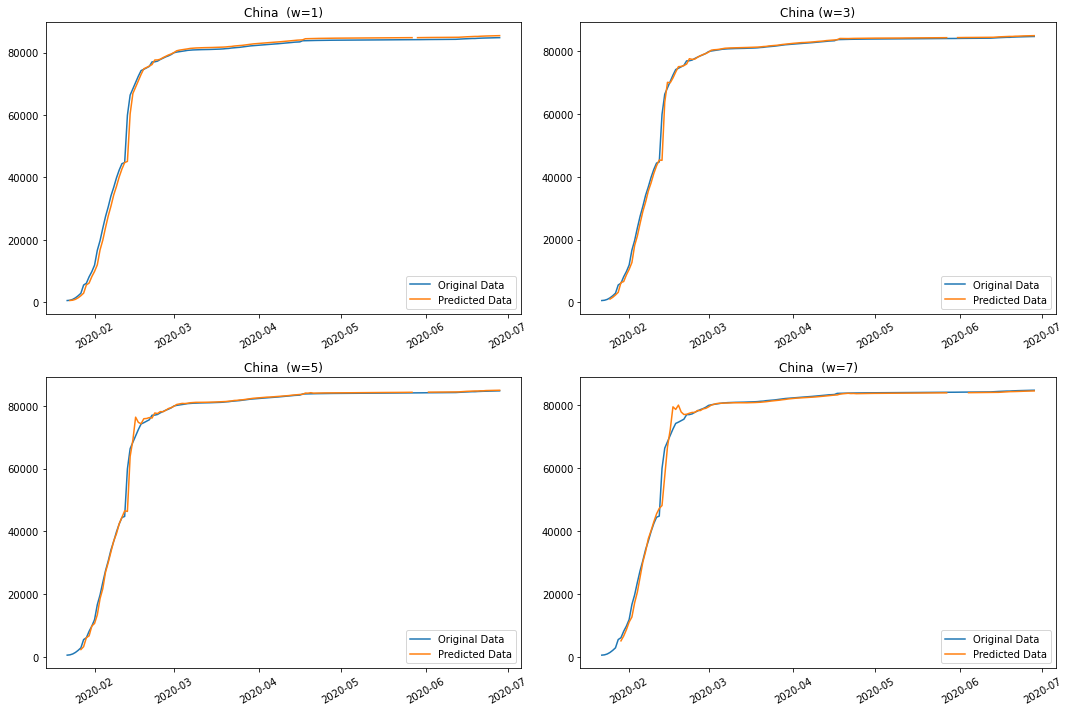

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(df.iloc[0])
plt.plot(df.iloc[1])
plt.xticks(rotation=30)
plt.legend('best', labels=["Original Data","Predicted Data"])
plt.title("China  (w=1)")

plt.subplot(2,2,2)
plt.plot(df2.iloc[0])
plt.plot(df2.iloc[1])
plt.xticks(rotation=30)
plt.legend('best', labels=["Original Data","Predicted Data"])
plt.title("China (w=3)")

plt.subplot(2,2,3)
plt.plot(df3.iloc[0])
plt.plot(df3.iloc[1])
plt.xticks(rotation=30)
plt.legend('best', labels=["Original Data","Predicted Data"])
plt.title("China  (w=5)")

plt.subplot(2,2,4)
plt.plot(df4.iloc[0])
plt.plot(df4.iloc[1])
plt.xticks(rotation=30)
plt.legend('best', labels=["Original Data","Predicted Data"])
plt.title("China  (w=7)")

plt.tight_layout()
plt.show()

When w increases, NN failed at capturing the turning point.

### Walk Forward Validation

In [ ]:
windowsize=[1,3,5,7]
init_trainsize=30

In [ ]:
train_RMSE, test_RMSE, train_size = wfv(windowsize, df_china, region="China", train=False, init_trainsize=30)

training with w = 1
training with w = 3
training with w = 5
training with w = 7


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


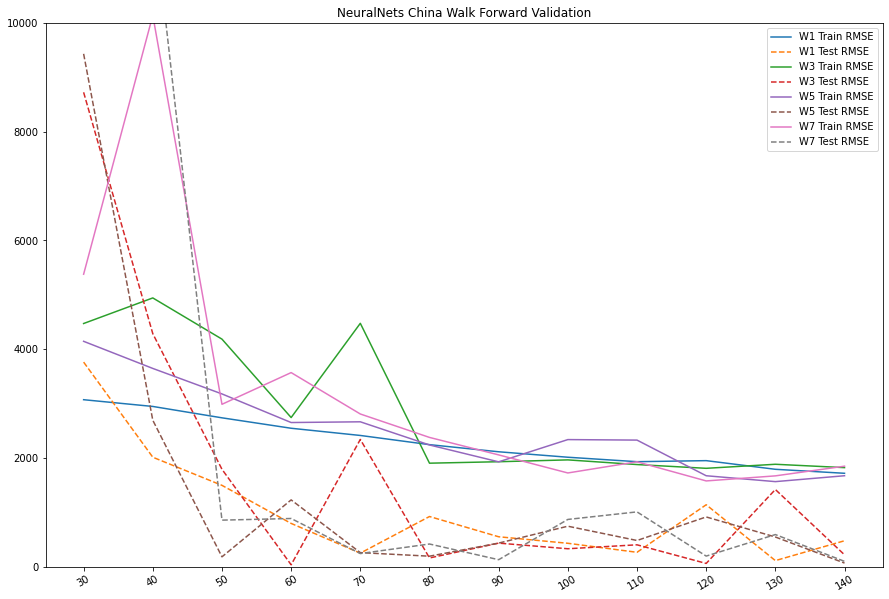

In [ ]:
xaxis = list(range(len(train_RMSE[0])))
plt.figure(figsize=(15,10))
plt.plot(train_RMSE[0], linestyle="solid")
plt.plot(test_RMSE[0], linestyle="dashed")

plt.plot(train_RMSE[1], linestyle="solid")
plt.plot(test_RMSE[1], linestyle="dashed")

plt.plot(train_RMSE[2], linestyle="solid")
plt.plot(test_RMSE[2], linestyle="dashed")

plt.plot(train_RMSE[3], linestyle="solid")
plt.plot(test_RMSE[3], linestyle="dashed")

plt.ylim((0,10000))
plt.xticks(xaxis, train_size, rotation=30)

plt.legend('best', labels=["W1 Train RMSE","W1 Test RMSE", 
                           "W3 Train RMSE", "W3 Test RMSE", 
                           "W5 Train RMSE", "W5 Test RMSE",
                          "W7 Train RMSE", "W7 Test RMSE"])
plt.title("NeuralNets China Walk Forward Validation")
plt.show()

In [ ]:
w1_train_mean = np.mean(train_RMSE[0])
w1_train_sd = np.std(train_RMSE[0])
w1_test_mean = np.mean(test_RMSE[0])
w1_test_sd = np.std(test_RMSE[0])

w3_train_mean = np.mean(train_RMSE[1])
w3_train_sd = np.std(train_RMSE[1])
w3_test_mean = np.mean(test_RMSE[1])
w3_test_sd = np.std(test_RMSE[1])

w5_train_mean = np.mean(train_RMSE[2])
w5_train_sd = np.std(train_RMSE[2])
w5_test_mean = np.mean(test_RMSE[2])
w5_test_sd = np.std(test_RMSE[2])

w7_train_mean = np.mean(train_RMSE[3])
w7_train_sd = np.std(train_RMSE[3])
w7_test_mean = np.mean(test_RMSE[3])
w7_test_sd = np.std(test_RMSE[3])

In [ ]:
print("Training set with window size = 1 has mean:{:.2f}, sd:{:.2f}".format(w1_train_mean, w1_train_sd))
print("Tesing set with window size = 1 has mean:{:.2f}, sd:{:.2f}".format(w1_test_mean, w1_test_sd))
print("Training set with window size = 3 has mean:{:.2f}, sd:{:.2f}".format(w3_train_mean, w3_train_sd))
print("Testing set with window size = 3 has mean:{:.2f}, sd:{:.2f}".format(w3_test_mean, w3_test_sd))
print("Training set with window size = 5 has mean:{:.2f}, sd:{:.2f}".format(w5_train_mean, w5_train_sd))
print("Testing set with window size = 5 has mean:{:.2f}, sd:{:.2f}".format(w5_test_mean, w5_test_sd))
print("Training set with window size = 7 has mean:{:.2f}, sd:{:.2f}".format(w7_train_mean, w7_train_sd))
print("Testing set with window size = 7 has mean:{:.2f}, sd:{:.2f}".format(w7_test_mean, w7_test_sd))

Training set with window size = 1 has mean:2289.38, sd:433.45
Tesing set with window size = 1 has mean:1017.10, sd:986.01
Training set with window size = 3 has mean:2834.01, sd:1224.74
Testing set with window size = 3 has mean:1682.88, sd:2445.31
Training set with window size = 5 has mean:2501.96, sd:776.08
Testing set with window size = 5 has mean:1430.66, sd:2507.22
Training set with window size = 7 has mean:3172.02, sd:2342.59
Testing set with window size = 7 has mean:2755.48, sd:5040.65


window size = 1 is better, tuning point affects overall performance
<br> Similar performance
<br> when w gets larger LSTM sd is smaller

### Forecasting

In [ ]:
w=1
r=1
forecast_days=10
china_forecast10_w1 = NN_forecast(df, model, forecast_days=forecast_days, w=w, r=r)
china_forecast10_w1.to_csv('China_forecast10_w1.csv', index=False, encoding='utf-8')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


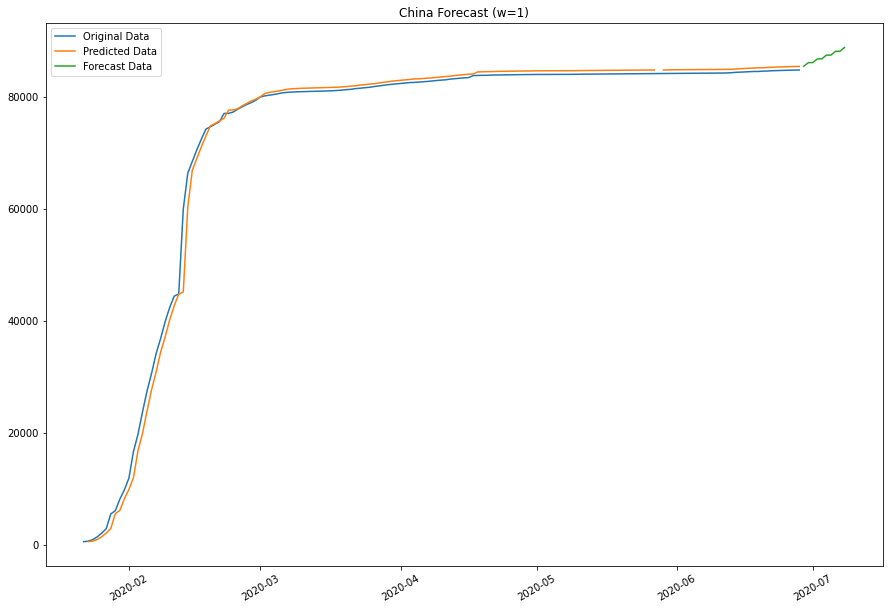

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(df.iloc[0])
plt.plot(df.iloc[1])
plt.plot(china_forecast10_w1.iloc[1,-forecast_days:])
plt.xticks(rotation=30)
plt.legend('best', labels=["Original Data","Predicted Data", "Forecast Data"])
plt.title("China Forecast (w=1)")
plt.show()

## Canada

In [ ]:
df_canada, _, _ = sum_regioncase(df_conf, "Canada", region_level="county")

In [ ]:
model = NeuralNets(train=False, world=False, country="Canada", w=1)

Load Model
With window size 1
Train Score: 349983.44 MSE (591.59 RMSE)
Test Score: 2794199.25 MSE (1671.59 RMSE)


In [ ]:
model2 = NeuralNets(train=False, world=False, country="Canada", w=3)

Load Model
With window size 3
Train Score: 1473750.62 MSE (1213.98 RMSE)
Test Score: 15166499.00 MSE (3894.42 RMSE)


In [ ]:
model3 = NeuralNets(train=False, world=False, country="Canada", w=5)

Load Model
With window size 5
Train Score: 287901.47 MSE (536.56 RMSE)
Test Score: 472114.56 MSE (687.11 RMSE)


In [ ]:
model4 = NeuralNets(train=False, world=False, country="Canada", w=7)

Load Model
With window size 7
Train Score: 106112.60 MSE (325.75 RMSE)
Test Score: 15135.20 MSE (123.03 RMSE)


In [ ]:
df = NN_pred(model,world=False, country="Canada", w=1)
df

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28
Original Data,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,7.000000,7.00000,7.00000,7.00000,7.00000,7.00000,7.00000,7.00000,7.00000,7.00000,8.00000,8.000000,8.000000,8.000000,9.000000,9.000000,9.000000,10.000000,11.000000,11.000000,13.000000,14.00000,20.000000,24.000000,...,81575.000000,82742.00000,83947.000000,85151.000000,86106.000000,87119.000000,88090.000,88989.00000,89976.0,90909.00000,91681.00,92479.000000,93288.000000,93960.000000,94641.000000,95269.000000,95947.000000,96475.000000,97178.000000,97779.000000,98241.000000,98720.000000,99159.000000,99595.000000,100043.00,100404.000000,100763.000,101087.000000,101491.000000,101877.000000,102314.00,102762.000000,103078.00,103418.000000,103767.000000,104087.000000,104463.000000,104629.000000,104878.000000,105193.000000
Predicted Data,NaN,17.294529,17.294529,17.294529,17.294529,18.316002,18.316002,19.337473,19.337473,19.337473,21.380415,21.380415,21.380415,21.380415,21.380415,22.401888,22.401888,24.44483,24.44483,24.44483,24.44483,24.44483,24.44483,24.44483,24.44483,24.44483,24.44483,25.466301,25.466301,25.466301,25.466301,26.487774,26.487774,26.487774,27.509245,28.530716,28.530716,30.57366,31.595131,37.723961,...,82238.609375,83343.84375,84535.890625,85766.765625,86996.617188,87972.117188,89006.875,89998.71875,NaN,91925.21875,92878.25,93666.828125,94481.960938,95308.335938,95994.757812,96690.382812,97331.867188,98024.421875,98563.765625,99281.851562,99895.757812,100367.679688,100856.960938,101305.382812,101750.75,102208.367188,102577.125,102943.835938,103274.789062,103687.453125,104081.75,104528.132812,104985.75,105308.539062,105655.828125,106012.335938,106339.195312,106723.273438,106892.835938,107147.179688


In [ ]:
df2 = NN_pred(model2,world=False, country="Canada", w=3)
df2

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28
Original Data,0.0,0.0,0.0,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,4.000000,4.000000,4.000000,4.00000,4.00000,5.00000,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,8.0000,8.000000,9.000000,9.000000,9.000000,10.000000,11.000000,11.000000,13.000000,14.000000,20.000000,24.000000,...,81575.00000,82742.000000,83947.000,85151.00000,86106.000000,87119.000000,88090.000000,88989.000000,89976.0,90909.0,91681.0,92479.000000,93288.000000,93960.000000,94641.0,95269.000000,95947.000000,96475.000000,97178.000,97779.0000,98241.00000,98720.000000,99159.00000,99595.000000,100043.0,100404.000000,100763.000000,101087.00000,101491.0,101877.00000,102314.000000,102762.000000,103078.000000,103418.000000,103767.000000,104087.00000,104463.000000,104629.00000,104878.000,105193.000000
Predicted Data,NaN,NaN,NaN,5.881602,5.881602,6.077359,6.571917,7.126728,7.621285,7.980341,8.371854,9.360969,10.07908,10.07908,10.07908,10.274836,10.769394,11.519961,12.509077,13.227186,13.227186,13.227186,13.227186,13.227186,13.227186,13.227186,13.227186,13.422943,13.9175,14.276556,14.276556,14.472313,14.966871,15.325926,15.521683,16.211996,17.065607,17.816177,19.001049,21.388256,...,83161.71875,84296.070312,85448.125,86649.65625,87900.304688,89115.359375,90218.265625,91252.234375,NaN,NaN,NaN,95219.109375,96092.117188,96922.335938,97740.5,98496.640625,99197.648438,99885.476562,100549.625,101191.8125,101846.71875,102486.804688,103024.84375,103513.554688,103988.0,104448.953125,104897.734375,105307.40625,105678.0,106046.21875,106437.921875,106859.414062,107301.835938,107742.164062,108125.851562,108475.78125,108833.109375,109190.28125,109523.625,109789.476562


In [ ]:
df3 = NN_pred(model3,world=False, country="Canada", w=5)
df3

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28
Original Data,0.0,0.0,0.0,0.0,1.0,1.000000,2.000000,2.000000,2.000000,4.000000,4.000000,4.000000,4.00000,4.000000,5.000000,5.000000,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,8.000000,8.000000,9.00000,9.00000,9.000000,10.000000,11.000000,11.000000,13.000000,14.000000,20.000000,24.000000,...,81575.000000,82742.000000,83947.00000,85151.00000,86106.0000,87119.000000,88090.000000,88989.000000,89976.0,90909.0,91681.0,92479.0,93288.0,93960.0000,94641.00000,95269.00000,95947.000000,96475.000000,97178.000000,97779.000000,98241.00000,98720.000000,99159.000000,99595.000000,100043.000000,100404.000000,100763.000000,101087.000000,101491.000000,101877.000000,102314.00000,102762.000000,103078.000000,103418.000000,103767.000000,104087.000000,104463.000000,104629.000000,104878.000000,105193.000000
Predicted Data,NaN,NaN,NaN,NaN,NaN,2.671386,3.192541,3.834501,4.630722,4.491615,5.969577,6.832267,6.91329,7.463424,7.104185,7.705632,8.226788,9.470194,10.78757,10.688975,11.239109,10.879869,10.879869,10.879869,10.879869,10.879869,10.879869,11.481318,12.002472,12.042984,12.31805,12.73988,13.261032,13.301546,14.178061,15.121042,15.682711,17.201183,18.940388,22.971634,...,81637.539062,82685.898438,83834.21875,85043.46875,86278.8125,87326.460938,88347.421875,89278.023438,NaN,NaN,NaN,NaN,NaN,94442.6875,95111.65625,95807.03125,96423.070312,97061.976562,97616.132812,98286.882812,98893.21875,99388.414062,99892.492188,100283.796875,100690.710938,101135.789062,101506.632812,101871.523438,102188.867188,102555.992188,102940.59375,103380.273438,103847.757812,104201.078125,104555.921875,104878.601562,105177.273438,105553.890625,105760.640625,106000.171875


In [ ]:
df4 = NN_pred(model4,world=False, country="Canada", w=7)
df4

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28
Original Data,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.000000,2.000000,4.000000,4.00000,4.000000,4.000000,4.000000,5.000000,5.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,8.000000,8.000000,9.000000,9.00000,9.00000,10.000000,11.00000,11.000000,13.00000,14.000000,20.000000,24.000000,...,81575.000000,82742.0,83947.00000,85151.000000,86106.000000,87119.000000,88090.000000,88989.00,89976.0,90909.0,91681.0,92479.0,93288.0,93960.0,94641.0,95269.000000,95947.000000,96475.000000,97178.000000,97779.000000,98241.000000,98720.000000,99159.000000,99595.000000,100043.000000,100404.000000,100763.000,101087.000000,101491.000000,101877.000000,102314.000000,102762.0000,103078.000000,103418.00000,103767.000000,104087.000000,104463.000000,104629.0000,104878.000000,105193.000000
Predicted Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.416194,8.900658,9.348227,10.54769,11.551478,11.672329,11.097878,11.340062,12.018659,11.884693,13.35177,14.223984,14.852895,14.407715,14.365904,14.354958,13.720571,13.720571,13.720571,13.720571,14.376916,14.877337,15.031724,14.903094,15.87958,16.19208,16.029272,16.55699,18.033894,18.50078,19.522034,21.370731,26.250212,...,81668.546875,82735.0,83823.15625,84964.203125,86184.898438,87250.953125,88251.679688,89211.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95377.523438,95944.640625,96586.757812,97091.945312,97676.585938,98277.070312,98804.703125,99195.070312,99627.703125,100040.898438,100371.265625,100719.125,101052.476562,101348.046875,101706.578125,102059.015625,102464.6875,102906.796875,103310.78125,103649.914062,103979.492188,104314.882812,104610.3125,104819.289062,105030.289062


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


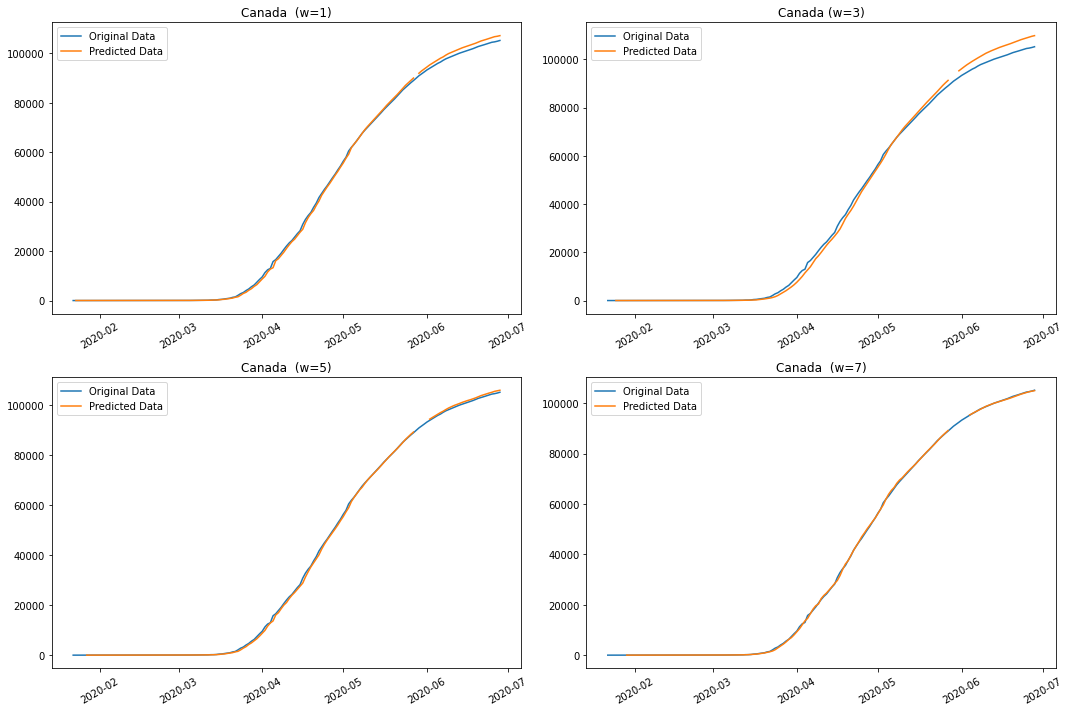

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(df.iloc[0])
plt.plot(df.iloc[1])
plt.xticks(rotation=30)
plt.legend('best', labels=["Original Data","Predicted Data"])
plt.title("Canada  (w=1)")

plt.subplot(2,2,2)
plt.plot(df2.iloc[0])
plt.plot(df2.iloc[1])
plt.xticks(rotation=30)
plt.legend('best', labels=["Original Data","Predicted Data"])
plt.title("Canada (w=3)")

plt.subplot(2,2,3)
plt.plot(df3.iloc[0])
plt.plot(df3.iloc[1])
plt.xticks(rotation=30)
plt.legend('best', labels=["Original Data","Predicted Data"])
plt.title("Canada  (w=5)")

plt.subplot(2,2,4)
plt.plot(df4.iloc[0])
plt.plot(df4.iloc[1])
plt.xticks(rotation=30)
plt.legend('best', labels=["Original Data","Predicted Data"])
plt.title("Canada  (w=7)")

plt.tight_layout()
plt.show()

### Walk Forward Validation

In [ ]:
windowsize=[1,3,5,7]

In [ ]:
train_RMSE, test_RMSE, train_size = wfv(windowsize, df_canada, region="Canada", train=False, init_trainsize=30)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


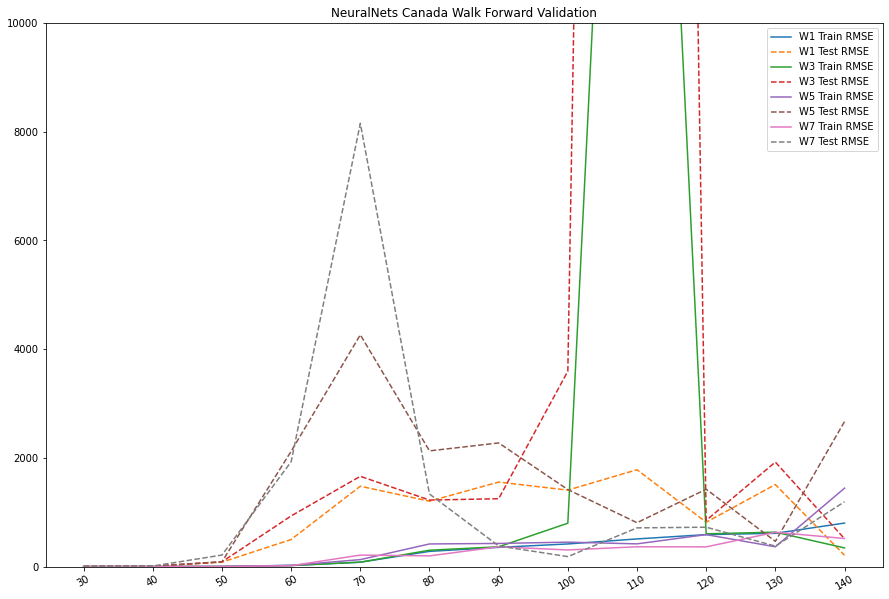

In [ ]:
xaxis = list(range(len(train_RMSE[0])))
plt.figure(figsize=(15,10))
plt.plot(train_RMSE[0], linestyle="solid")
plt.plot(test_RMSE[0], linestyle="dashed")

plt.plot(train_RMSE[1], linestyle="solid")
plt.plot(test_RMSE[1], linestyle="dashed")

plt.plot(train_RMSE[2], linestyle="solid")
plt.plot(test_RMSE[2], linestyle="dashed")

plt.plot(train_RMSE[3], linestyle="solid")
plt.plot(test_RMSE[3], linestyle="dashed")

plt.ylim((0,10000))
plt.xticks(xaxis, train_size, rotation=30)

plt.legend('best', labels=["W1 Train RMSE","W1 Test RMSE", 
                           "W3 Train RMSE", "W3 Test RMSE", 
                           "W5 Train RMSE", "W5 Test RMSE",
                          "W7 Train RMSE", "W7 Test RMSE"])
plt.title("NeuralNets Canada Walk Forward Validation")
plt.show()

In [ ]:
w1_train_mean = np.mean(train_RMSE[0])
w1_train_sd = np.std(train_RMSE[0])
w1_test_mean = np.mean(test_RMSE[0])
w1_test_sd = np.std(test_RMSE[0])

w3_train_mean = np.mean(train_RMSE[1])
w3_train_sd = np.std(train_RMSE[1])
w3_test_mean = np.mean(test_RMSE[1])
w3_test_sd = np.std(test_RMSE[1])

w5_train_mean = np.mean(train_RMSE[2])
w5_train_sd = np.std(train_RMSE[2])
w5_test_mean = np.mean(test_RMSE[2])
w5_test_sd = np.std(test_RMSE[2])

w7_train_mean = np.mean(train_RMSE[3])
w7_train_sd = np.std(train_RMSE[3])
w7_test_mean = np.mean(test_RMSE[3])
w7_test_sd = np.std(test_RMSE[3])

In [ ]:
print("Training set with window size = 1 has mean:{:.2f}, sd:{:.2f}".format(w1_train_mean, w1_train_sd))
print("Tesing set with window size = 1 has mean:{:.2f}, sd:{:.2f}".format(w1_test_mean, w1_test_sd))
print("Training set with window size = 3 has mean:{:.2f}, sd:{:.2f}".format(w3_train_mean, w3_train_sd))
print("Testing set with window size = 3 has mean:{:.2f}, sd:{:.2f}".format(w3_test_mean, w3_test_sd))
print("Training set with window size = 5 has mean:{:.2f}, sd:{:.2f}".format(w5_train_mean, w5_train_sd))
print("Testing set with window size = 5 has mean:{:.2f}, sd:{:.2f}".format(w5_test_mean, w5_test_sd))
print("Training set with window size = 7 has mean:{:.2f}, sd:{:.2f}".format(w7_train_mean, w7_train_sd))
print("Testing set with window size = 7 has mean:{:.2f}, sd:{:.2f}".format(w7_test_mean, w7_test_sd))

Training set with window size = 1 has mean:306.33, sd:271.60
Tesing set with window size = 1 has mean:879.66, sd:656.87
Training set with window size = 3 has mean:2475.43, sd:7263.98
Testing set with window size = 3 has mean:7527.16, sd:21353.34
Training set with window size = 5 has mean:355.64, sd:387.05
Testing set with window size = 5 has mean:1473.47, sd:1237.91
Training set with window size = 7 has mean:248.57, sd:205.12
Testing set with window size = 7 has mean:1268.75, sd:2150.86


window size = 1 is better, w = 7 has overfitting problem
<br> NN is better

### Forecasting

In [ ]:
w=1
r=1
forecast_days=10
canada_forecast10_w1 = NN_forecast(df, model, forecast_days=forecast_days, w=w, r=r)
canada_forecast10_w1.to_csv('CanadaNN_forecast10_w1.csv', index=False, encoding='utf-8')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


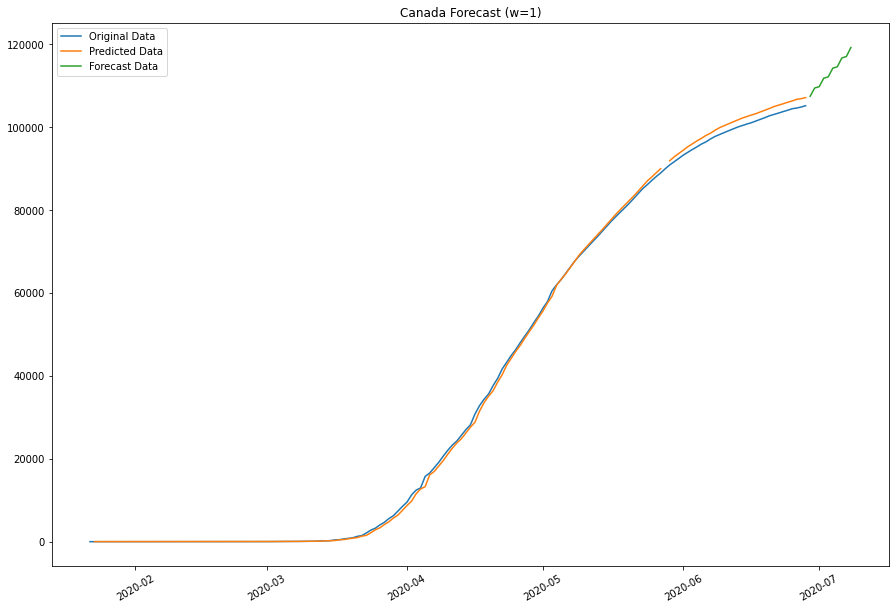

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(df.iloc[0])
plt.plot(df.iloc[1])
plt.plot(canada_forecast10_w1.iloc[1,-forecast_days:])
plt.xticks(rotation=30)
plt.legend('best', labels=["Original Data","Predicted Data", "Forecast Data"])
plt.title("Canada Forecast (w=1)")
plt.show()

In [ ]:
w=7
r=1
forecast_days=10
canada_forecast10_w7 = NN_forecast(df4, model4, forecast_days=forecast_days, w=w, r=r)
canada_forecast10_w7.to_csv('CanadaNN_forecast10_w{}.csv'.format(w), index=False, encoding='utf-8')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


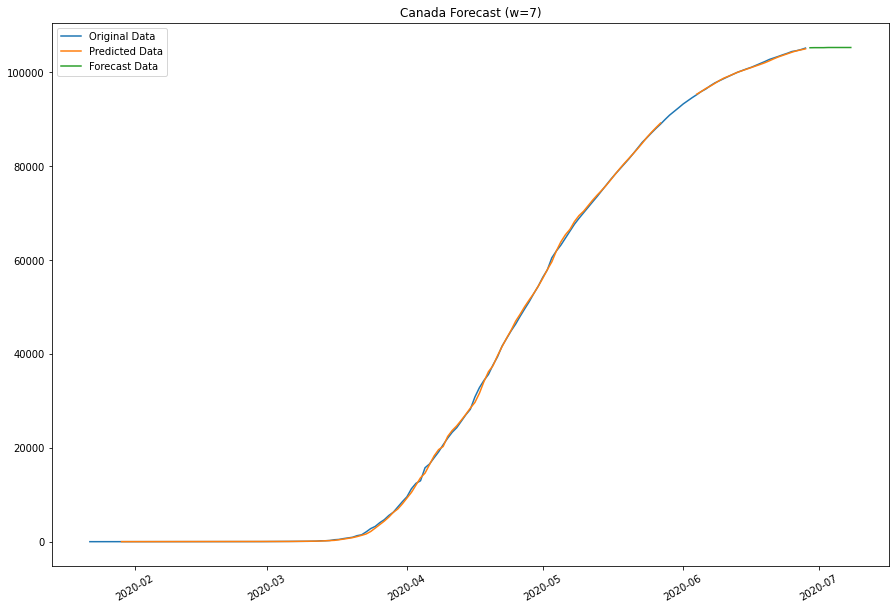

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(df4.iloc[0])
plt.plot(df4.iloc[1])
plt.plot(canada_forecast10_w7.iloc[1,-forecast_days:])
plt.xticks(rotation=30)
plt.legend('best', labels=["Original Data","Predicted Data", "Forecast Data"])
plt.title("Canada Forecast (w=7)")
plt.show()

## Italy

In [ ]:
df_italy, _, _ = sum_regioncase(df_conf, "Italy", region_level="county")

In [ ]:
model = NeuralNets(train=False, world=False, country="Italy", w=1)

Load Model
With window size 1
Train Score: 5331125.50 MSE (2308.92 RMSE)
Test Score: 18723166.00 MSE (4327.03 RMSE)


In [ ]:
model2 = NeuralNets(train=False, world=False, country="Italy", w=3)

Load Model
With window size 3
Train Score: 5671693.00 MSE (2381.53 RMSE)
Test Score: 3139232.00 MSE (1771.79 RMSE)


In [ ]:
model3 = NeuralNets(train=False, world=False, country="Italy", w=5)

Load Model
With window size 5
Train Score: 1333667.88 MSE (1154.85 RMSE)
Test Score: 16703.46 MSE (129.24 RMSE)


In [ ]:
model4 = NeuralNets(train=False, world=False, country="Italy", w=7)

Load Model
With window size 7
Train Score: 1751709.75 MSE (1323.52 RMSE)
Test Score: 406368.47 MSE (637.47 RMSE)


In [ ]:
df = NN_pred(model,world=False, country="Italy", w=1)
df

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28
Original Data,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,62.00000,155.000000,229.000000,322.000000,453.00000,655.000000,888.000000,1128.000000,1694.000000,...,227364.00000,228006.000000,228658.0,229327.00000,229858.000,230158.0000,230555.000000,231139.0,231732.0,232248.000000,232664.000000,232997.00000,233197.0000,233515.0000,233836.0,234013.000000,234531.0000,234801.000000,234998.000000,235278.000000,235561.000000,235763.000000,236142.00000,236305.00000,236651.000000,236989.000000,237290.00000,237500.0000,237828.00000,238159.000000,238011.0000,238275.000000,238499.000000,238720.000000,238833.000000,239410.000000,239706.000000,239961.00,240136.0000,240310.000000
Predicted Data,NaN,10.916353,10.916353,10.916353,10.916353,10.916353,10.916353,10.916353,10.916353,10.916353,13.405791,13.405791,13.405791,13.405791,13.405791,13.405791,13.405791,14.650511,14.650511,14.650511,14.650511,14.650511,14.650511,14.650511,14.650511,14.650511,14.650511,14.650511,14.650511,14.650511,14.650511,32.73558,75.551361,170.357727,245.795044,340.60144,474.145874,680.069397,917.595093,1162.256592,...,231114.59375,231792.515625,232447.0,233111.65625,233793.625,234334.9375,234640.796875,235045.5,NaN,236245.359375,236771.390625,237195.46875,237534.9375,237738.8125,238063.0,238390.234375,238570.6875,239098.734375,239373.953125,239574.796875,239860.234375,240148.734375,240354.65625,240741.03125,240907.171875,241259.890625,241604.46875,241911.3125,242125.40625,242459.765625,242797.1875,242646.328125,242915.453125,243143.796875,243369.109375,243484.296875,244072.484375,244374.25,244634.1875,244812.609375


In [ ]:
df2 = NN_pred(model2,world=False, country="Italy", w=3)
df2

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28
Original Data,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,62.00000,155.000000,229.000000,322.00000,453.000000,655.000000,888.00000,1128.000000,1694.000000,...,227364.00000,228006.00000,228658.000000,229327.000000,229858.00000,230158.0000,230555.000000,231139.00000,231732.0,232248.0,232664.0,232997.000000,233197.00000,233515.00000,233836.000000,234013.00000,234531.000000,234801.0000,234998.000000,235278.00000,235561.00000,235763.000000,236142.00000,236305.000000,236651.000000,236989.000000,237290.000,237500.0000,237828.000,238159.0000,238011.00000,238275.000000,238499.00000,238720.000000,238833.000000,239410.000000,239706.00000,239961.00000,240136.000000,240310.000000
Predicted Data,NaN,NaN,NaN,7.165329,7.165329,7.165329,7.165329,7.165329,7.165329,7.165329,8.437048,9.568443,9.883015,9.883015,9.883015,9.883015,9.883015,10.518875,11.084573,11.241859,11.241859,11.241859,11.241859,11.241859,11.241859,11.241859,11.241859,11.241859,11.241859,11.241859,11.241859,22.05147,57.220825,134.622162,225.00972,312.419647,434.756989,618.76825,855.674072,1106.788696,...,228474.28125,229324.71875,229933.390625,230579.359375,231250.34375,231848.6875,232201.953125,232486.65625,NaN,NaN,NaN,234676.546875,235014.15625,235243.90625,235472.234375,235833.34375,236072.546875,236406.5625,236893.171875,237041.09375,237265.21875,237576.546875,237814.84375,238097.234375,238409.078125,238611.578125,239015.625,239331.9375,239569.375,239821.5625,240192.71875,240243.046875,240181.90625,240559.109375,240770.171875,240927.953125,241282.21875,241848.96875,242031.296875,242227.609375


In [ ]:
df3 = NN_pred(model3,world=False, country="Italy", w=5)
df3

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28
Original Data,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.00000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,62.000000,155.000000,229.000000,322.000000,453.000000,655.000000,888.000000,1128.000000,1694.000000,...,227364.000000,228006.000000,228658.0,229327.000000,229858.000000,230158.000000,230555.00000,231139.0,231732.0,232248.0,232664.0,232997.0,233197.0,233515.000000,233836.000,234013.00000,234531.0000,234801.000000,234998.0000,235278.000,235561.00000,235763.00000,236142.00000,236305.00000,236651.0,236989.000000,237290.00000,237500.000000,237828.000000,238159.000000,238011.0000,238275.000000,238499.000,238720.000000,238833.00000,239410.00000,239706.00000,239961.000000,240136.000000,240310.000000
Predicted Data,NaN,NaN,NaN,NaN,NaN,6.560917,6.560917,6.560917,6.560917,6.560917,7.576974,11.168091,10.079365,9.751218,8.93015,8.93015,8.93015,9.576356,11.186047,10.725737,10.338008,9.911314,9.911314,9.911314,9.911314,9.911314,9.911314,9.911314,9.911314,9.911314,9.911314,18.544668,64.320732,164.277786,307.027435,394.845032,528.483887,736.451111,1036.963623,1331.836548,...,226665.328125,227300.703125,228024.0,228642.703125,229315.203125,229894.140625,230310.03125,230721.5,NaN,NaN,NaN,NaN,NaN,233436.421875,233749.625,234041.46875,234285.5625,234709.609375,234977.3125,235289.375,235518.53125,235797.15625,236037.40625,236367.65625,236560.0,236909.765625,237181.65625,237524.703125,237761.109375,238068.921875,238369.1875,238402.765625,238628.875,238743.078125,239034.28125,239151.21875,239594.53125,239872.265625,240242.359375,240404.609375


In [ ]:
df4 = NN_pred(model4,world=False, country="Italy", w=7)
df4

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28
Original Data,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,62.00000,155.000000,229.000000,322.000000,453.000000,655.000000,888.00000,1128.000000,1694.000000,...,227364.0,228006.00000,228658.00000,229327.0000,229858.000000,230158.00000,230555.0,231139.000000,231732.0,232248.0,232664.0,232997.0,233197.0,233515.0,233836.0,234013.00000,234531.0000,234801.0000,234998.000,235278.000,235561.0,235763.00000,236142.00000,236305.0000,236651.000000,236989.00,237290.0000,237500.000000,237828.000000,238159.000,238011.000000,238275.00000,238499.000000,238720.000000,238833.000000,239410.000000,239706.000,239961.000000,240136.000000,240310.000000
Predicted Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.671072,5.671072,5.671072,6.082355,6.902844,7.518583,8.19088,9.310555,9.644063,8.770658,8.976299,9.386544,9.734022,10.060232,10.590399,10.779982,10.320451,10.320451,10.320451,10.320451,10.320451,10.320451,10.320451,10.320451,13.81636,29.427469,72.833122,148.024719,255.967346,401.642059,604.58374,852.304932,1114.458496,...,227234.5,227750.09375,228337.84375,228614.8125,229435.203125,230181.46875,230507.0,230899.265625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233809.34375,233900.4375,234084.0625,234379.125,234813.875,234929.5,235381.96875,235659.84375,235697.4375,235938.828125,236332.75,236531.4375,236967.109375,237178.890625,237471.875,237893.734375,237967.15625,238040.703125,238155.609375,238494.515625,238217.515625,238591.125,239182.671875,239548.078125,239674.921875


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


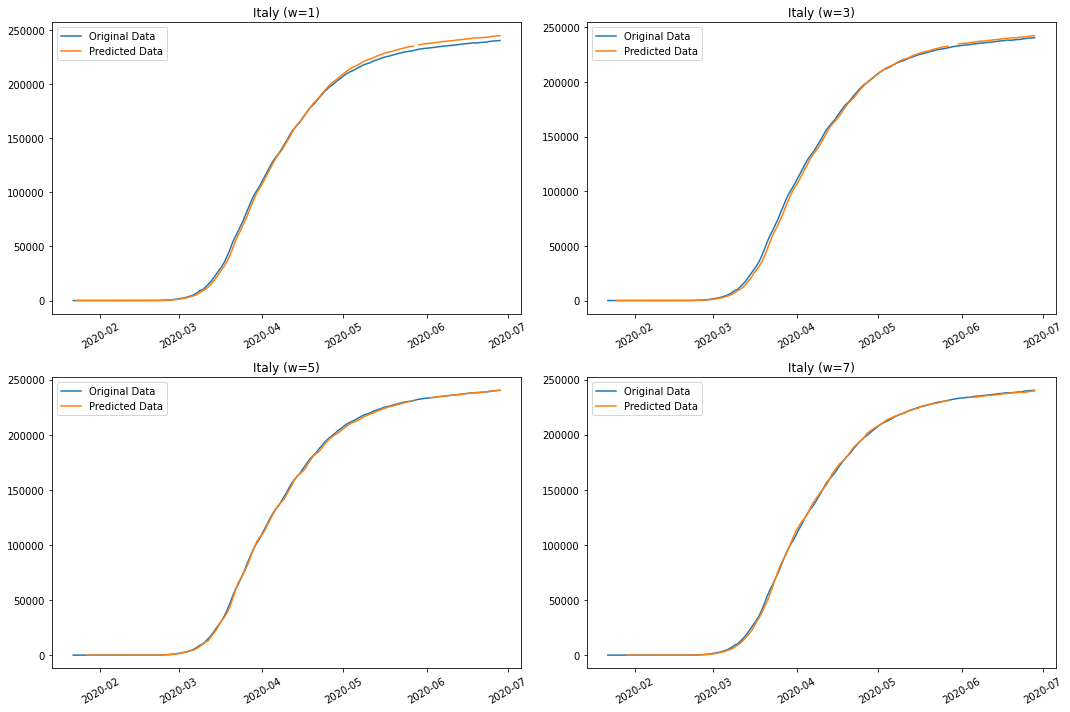

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(df.iloc[0])
plt.plot(df.iloc[1])
plt.xticks(rotation=30)
plt.legend('best', labels=["Original Data","Predicted Data"])
plt.title("Italy (w=1)")

plt.subplot(2,2,2)
# plt.figure(figsize=(15,10))
plt.plot(df2.iloc[0])
plt.plot(df2.iloc[1])
plt.xticks(rotation=30)
plt.legend('best', labels=["Original Data","Predicted Data"])
plt.title("Italy (w=3)")

plt.subplot(2,2,3)
# plt.figure(figsize=(15,10))
plt.plot(df3.iloc[0])
plt.plot(df3.iloc[1])
plt.xticks(rotation=30)
plt.legend('best', labels=["Original Data","Predicted Data"])
plt.title("Italy (w=5)")

plt.subplot(2,2,4)
# plt.figure(figsize=(15,10))
plt.plot(df4.iloc[0])
plt.plot(df4.iloc[1])
plt.xticks(rotation=30)
plt.legend('best', labels=["Original Data","Predicted Data"])
plt.title("Italy (w=7)")

plt.tight_layout()
plt.show()

In [ ]:
train_RMSE, test_RMSE, train_size = wfv(windowsize, df_italy, region="Italy", train=False, init_trainsize=30)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


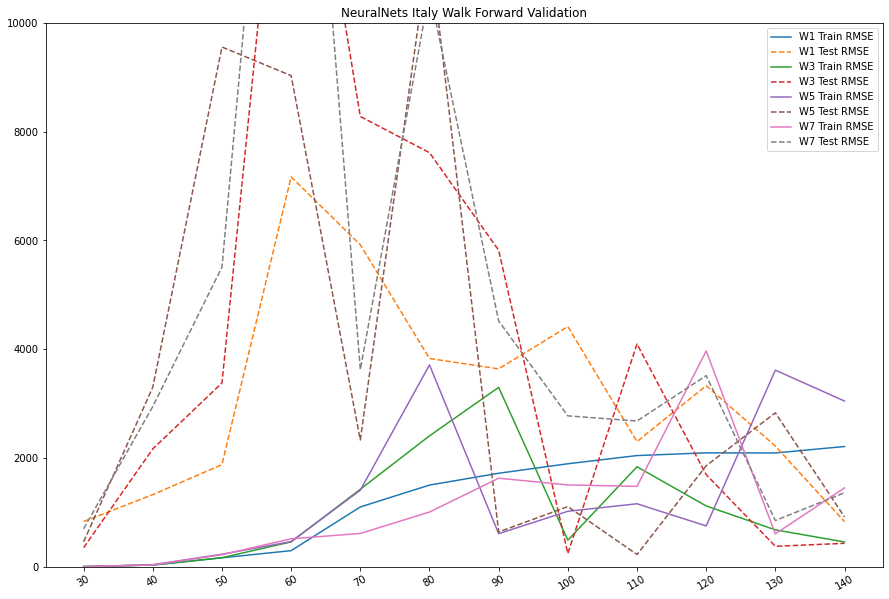

In [ ]:
xaxis = list(range(len(train_RMSE[0])))
plt.figure(figsize=(15,10))
plt.plot(train_RMSE[0], linestyle="solid")
plt.plot(test_RMSE[0], linestyle="dashed")

plt.plot(train_RMSE[1], linestyle="solid")
plt.plot(test_RMSE[1], linestyle="dashed")

plt.plot(train_RMSE[2], linestyle="solid")
plt.plot(test_RMSE[2], linestyle="dashed")

plt.plot(train_RMSE[3], linestyle="solid")
plt.plot(test_RMSE[3], linestyle="dashed")

plt.ylim((0,10000))
plt.xticks(xaxis, train_size, rotation=30)

plt.legend('best', labels=["W1 Train RMSE","W1 Test RMSE", 
                           "W3 Train RMSE", "W3 Test RMSE", 
                           "W5 Train RMSE", "W5 Test RMSE",
                          "W7 Train RMSE", "W7 Test RMSE"])
plt.title("NeuralNets Italy Walk Forward Validation")
plt.show()

In [ ]:
w1_train_mean = np.mean(train_RMSE[0])
w1_train_sd = np.std(train_RMSE[0])
w1_test_mean = np.mean(test_RMSE[0])
w1_test_sd = np.std(test_RMSE[0])

w3_train_mean = np.mean(train_RMSE[1])
w3_train_sd = np.std(train_RMSE[1])
w3_test_mean = np.mean(test_RMSE[1])
w3_test_sd = np.std(test_RMSE[1])

w5_train_mean = np.mean(train_RMSE[2])
w5_train_sd = np.std(train_RMSE[2])
w5_test_mean = np.mean(test_RMSE[2])
w5_test_sd = np.std(test_RMSE[2])

w7_train_mean = np.mean(train_RMSE[3])
w7_train_sd = np.std(train_RMSE[3])
w7_test_mean = np.mean(test_RMSE[3])
w7_test_sd = np.std(test_RMSE[3])

In [ ]:
print("Training set with window size = 1 has mean:{:.2f}, sd:{:.2f}".format(w1_train_mean, w1_train_sd))
print("Tesing set with window size = 1 has mean:{:.2f}, sd:{:.2f}".format(w1_test_mean, w1_test_sd))
print("Training set with window size = 3 has mean:{:.2f}, sd:{:.2f}".format(w3_train_mean, w3_train_sd))
print("Testing set with window size = 3 has mean:{:.2f}, sd:{:.2f}".format(w3_test_mean, w3_test_sd))
print("Training set with window size = 5 has mean:{:.2f}, sd:{:.2f}".format(w5_train_mean, w5_train_sd))
print("Testing set with window size = 5 has mean:{:.2f}, sd:{:.2f}".format(w5_test_mean, w5_test_sd))
print("Training set with window size = 7 has mean:{:.2f}, sd:{:.2f}".format(w7_train_mean, w7_train_sd))
print("Testing set with window size = 7 has mean:{:.2f}, sd:{:.2f}".format(w7_test_mean, w7_test_sd))

Training set with window size = 1 has mean:1261.15, sd:857.80
Tesing set with window size = 1 has mean:3140.03, sd:1903.77
Training set with window size = 3 has mean:1029.08, sd:989.20
Testing set with window size = 3 has mean:4206.21, sd:4485.08
Training set with window size = 5 has mean:1336.09, sd:1298.53
Testing set with window size = 5 has mean:3640.45, sd:3822.21
Training set with window size = 7 has mean:1083.57, sd:1036.29
Testing set with window size = 7 has mean:4882.91, sd:5087.31


Widow size w = 1 or 5 might work (low test mean)
<br> w = 7 results in overfitting
<br> NN is better

### Forecasting

In [ ]:
w=1
r=1
forecast_days=10
italy_forecast10_w1 = NN_forecast(df, model, forecast_days=forecast_days, w=w, r=r)
italy_forecast10_w1.to_csv('ItalyNN_forecast10_w1.csv', index=False, encoding='utf-8')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


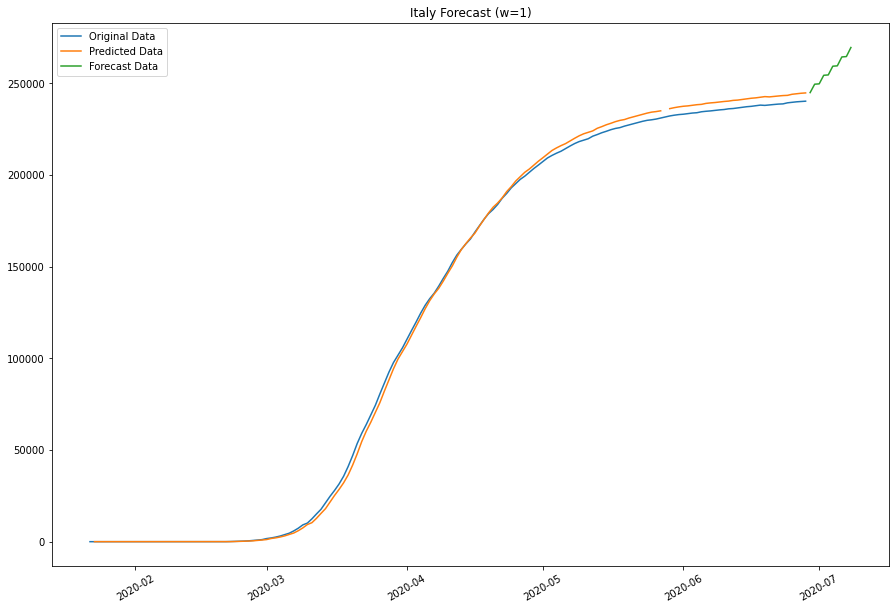

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(df.iloc[0])
plt.plot(df.iloc[1])
plt.plot(italy_forecast10_w1.iloc[1,-forecast_days:])
plt.xticks(rotation=30)
plt.legend('best', labels=["Original Data","Predicted Data", "Forecast Data"])
plt.title("Italy Forecast (w=1)")
plt.show()

In [ ]:
w=5
r=1
forecast_days=10
italy_forecast10_w5 = NN_forecast(df3, model3, forecast_days=forecast_days, w=w, r=r)
italy_forecast10_w5.to_csv('ItalyNN_forecast10_w{}.csv'.format(w), index=False, encoding='utf-8')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


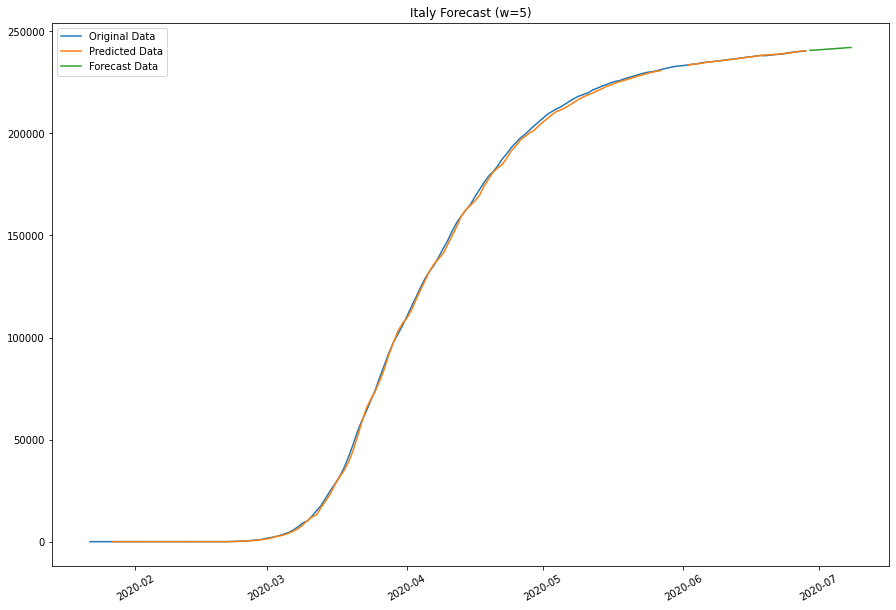

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(df3.iloc[0])
plt.plot(df3.iloc[1])
plt.plot(italy_forecast10_w5.iloc[1,-forecast_days:])
plt.xticks(rotation=30)
plt.legend('best', labels=["Original Data","Predicted Data", "Forecast Data"])
plt.title("Italy Forecast (w=5)")
plt.show()